# BUSINESS UNDERSTANDING

This project analyzes customer transactional data from an eCommerce platform to uncover behavioral insights and patterns. 
It showcases practical data analytics skills including cleaning, exploration, behavioral analysis, and visualization.

## Objectives

- Understand customer purchase behavior
- Analyze trends in product sales, returns, and churn
- Segment customers for targeted marketing
- Demonstrate skills in pandas, matplotlib/seaborn, and storytelling with data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("NumPy:", np.__version__)

NumPy: 1.18.5


## Data Understanding and Data Cleaning

In [2]:
# Load the dataset
df = pd.read_csv('C:/Users/USER/OneDrive/Desktop/Data science/Data Analyst Applications/ecommerce_customer_large_data.csv')  

# Quick overview
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,202618.000000,250000.000000,250000.00000
mean,25017.632092,254.742724,3.004936,2725.385196,43.798276,0.500824,43.798276,0.20052
std,14412.515718,141.738104,1.414737,1442.576095,15.364915,0.500001,15.364915,0.40039
min,1.000000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.00000
25%,12590.000000,132.000000,2.000000,1476.000000,30.000000,0.000000,30.000000,0.00000
50%,25011.000000,255.000000,3.000000,2725.000000,44.000000,1.000000,44.000000,0.00000
75%,37441.250000,377.000000,4.000000,3975.000000,57.000000,1.000000,57.000000,0.00000
max,50000.000000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.00000


In [3]:
# checking for duplicated rows

print("Duplicate rows:", df.duplicated().sum())

# Checking for missing values
df.isnull().sum().sort_values(ascending=False)

Duplicate rows: 0


Returns                  47382
Churn                        0
Gender                       0
Age                          0
Customer Name                0
Customer Age                 0
Payment Method               0
Total Purchase Amount        0
Quantity                     0
Product Price                0
Product Category             0
Purchase Date                0
Customer ID                  0
dtype: int64

In [4]:
# Check unique values in Returns
df['Returns'].value_counts(dropna=False)


1.0    101476
0.0    101142
NaN     47382
Name: Returns, dtype: int64

In [5]:
# Fill missing returns as 0 and convert to integer
df['Returns'] = df['Returns'].fillna(0).astype(int)

In [6]:
# Convert Purchase Date to datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

In [7]:
# Drop duplicate Age column if it's identical
df = df.drop(columns=['Age'])  # We keep 'Customer Age' instead


In [8]:
# Summary statistics
df.describe()

# Info again after changes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            250000 non-null  int64         
 1   Purchase Date          250000 non-null  datetime64[ns]
 2   Product Category       250000 non-null  object        
 3   Product Price          250000 non-null  int64         
 4   Quantity               250000 non-null  int64         
 5   Total Purchase Amount  250000 non-null  int64         
 6   Payment Method         250000 non-null  object        
 7   Customer Age           250000 non-null  int64         
 8   Returns                250000 non-null  int32         
 9   Customer Name          250000 non-null  object        
 10  Gender                 250000 non-null  object        
 11  Churn                  250000 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(6), ob

### EXPLORATORY DATA ANALYSIS

#### Univariate Analysis

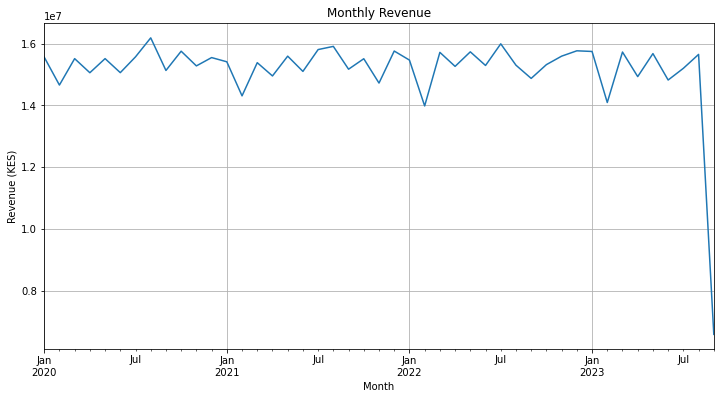

In [9]:
# Purchases over time
df.set_index('Purchase Date')['Total Purchase Amount'].resample('M').sum().plot(figsize=(12,6), title='Monthly Revenue')
plt.ylabel('Revenue (KES)')
plt.xlabel('Month')
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Customer Age Distribution')

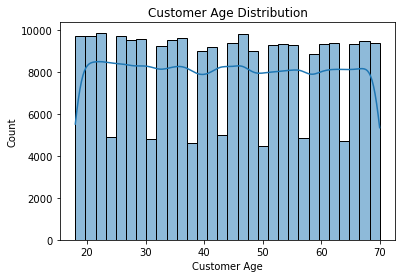

In [10]:
## Distribution Analysis
# Age distribution
sns.histplot(df['Customer Age'], bins=30, kde=True)
plt.title("Customer Age Distribution")

Text(0.5, 1.0, 'Gender Distribution')

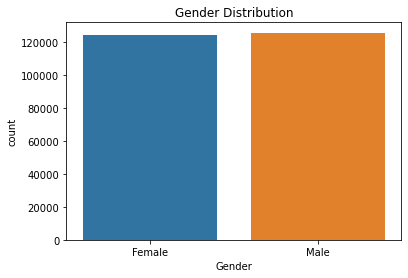

In [11]:
# Gender distribution
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")

Text(0.5, 1.0, 'Preferred Payment Methods')

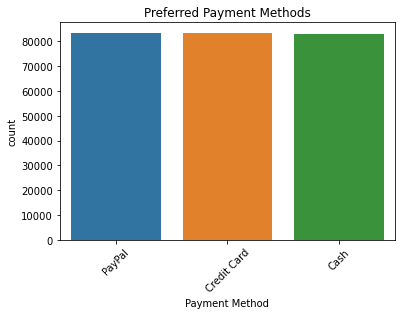

In [12]:
# Payment method
sns.countplot(x='Payment Method', data=df)
plt.xticks(rotation=45)
plt.title("Preferred Payment Methods")

In [13]:
df['Product Category'].unique()

array(['Home', 'Electronics', 'Books', 'Clothing'], dtype=object)

In [14]:
df['Product Category'].value_counts()

Electronics    62630
Clothing       62581
Home           62542
Books          62247
Name: Product Category, dtype: int64

#### Bivariate Analysis

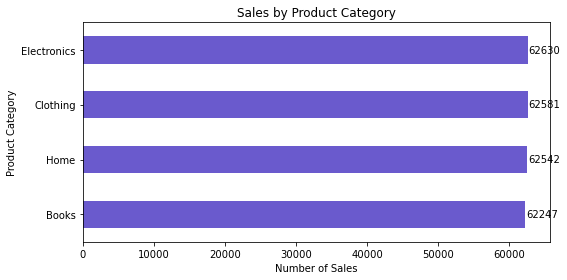

In [15]:
counts = df['Product Category'].value_counts()
counts.sort_values().plot(kind='barh', color='slateblue', figsize=(8, 4))

for index, value in enumerate(counts.sort_values()):
    plt.text(value + 100, index, str(value), va='center')  # Add count labels

plt.title("Sales by Product Category")
plt.xlabel("Number of Sales")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()


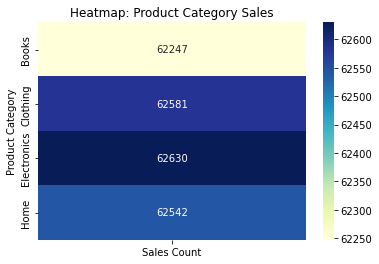

In [16]:
#Heatmap of the product purchase history
product_counts = df['Product Category'].value_counts().reset_index()
product_counts.columns = ['Product Category', 'Sales Count']

sns.heatmap(product_counts.pivot_table(values='Sales Count', 
                                       index='Product Category'), 
            annot=True, fmt='.0f', cmap='YlGnBu')

plt.title("Heatmap: Product Category Sales")
plt.show()

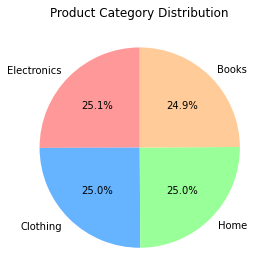

In [17]:
counts = df['Product Category'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("Product Category Distribution")
plt.ylabel("")  # Hides y-axis
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Total Revenue (KES)')

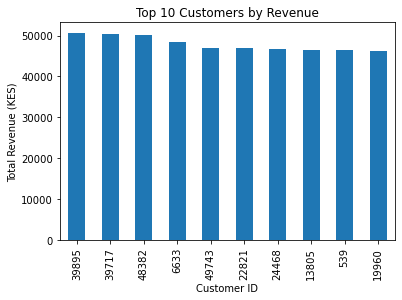

In [18]:
# Revenue by customer
top_customers = df.groupby('Customer ID')['Total Purchase Amount'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', title='Top 10 Customers by Revenue')
plt.ylabel("Total Revenue (KES)")


In [19]:
# Return Analysis
# Percentage of returns
returned = df['Returns'].notnull().mean() * 100
print(f"Percentage of orders with returns recorded: {returned:.2f}%")

Percentage of orders with returns recorded: 100.00%


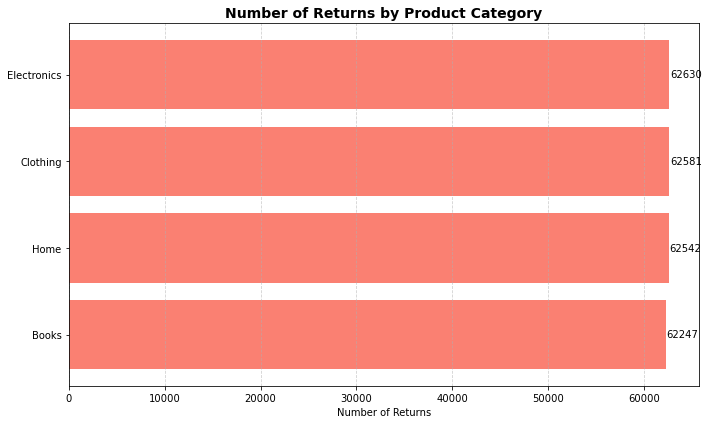

In [20]:
# Filter and count returns by category
returns_by_category = df[df['Returns'].notnull()] \
    .groupby('Product Category')['Returns'] \
    .count().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(returns_by_category.index, returns_by_category.values, color='salmon')

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 100, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center')

# Style
plt.title("Number of Returns by Product Category", fontsize=14, weight='bold')
plt.xlabel("Number of Returns")
plt.gca().invert_yaxis()  # Highest at top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

([<matplotlib.axis.XTick at 0x1754e183550>,
 [Text(0, 0, 'Active'), Text(1, 0, 'Churned')])

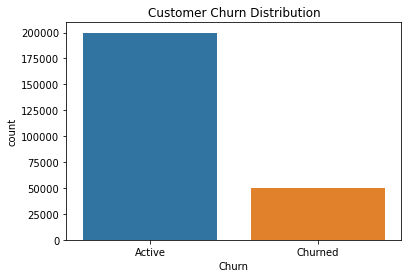

In [21]:
#Churn vs Non-Churn Customer Behavior
# Count of churned customers
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.xticks([0, 1], ['Active', 'Churned'])


([<matplotlib.axis.XTick at 0x1754e081820>,
 [Text(0, 0, 'Active'), Text(1, 0, 'Churned')])

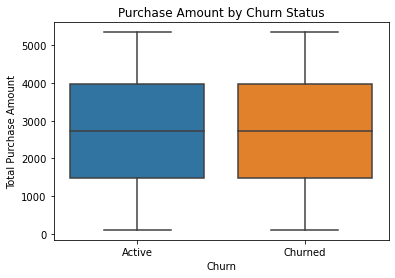

In [22]:
# Revenue comparison
sns.boxplot(x='Churn', y='Total Purchase Amount', data=df)
plt.title("Purchase Amount by Churn Status")
plt.xticks([0, 1], ['Active', 'Churned'])


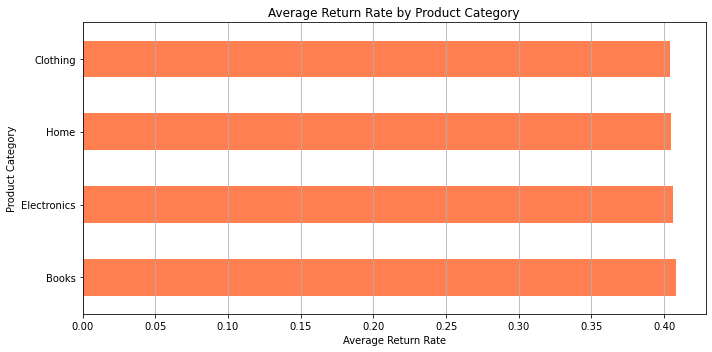

In [23]:
# Avg return rate by product category
df.groupby('Product Category')['Returns'].mean().sort_values(ascending=False).plot(kind='barh', figsize=(10, 5), color='coral')
plt.title("Average Return Rate by Product Category")
plt.xlabel("Average Return Rate")
plt.ylabel("Product Category")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

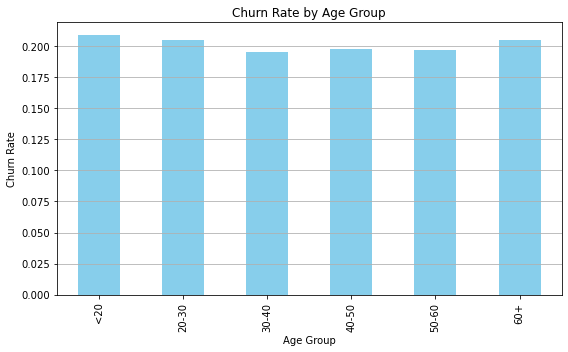

In [24]:
# Create age groups
df['Age Group'] = pd.cut(df['Customer Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['<20','20-30','30-40','40-50','50-60','60+'])

# Churn rate per age group
churn_by_age = df.groupby('Age Group')['Churn'].mean()

churn_by_age.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title("Churn Rate by Age Group")
plt.ylabel("Churn Rate")
plt.xlabel("Age Group")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### Multivariate Analysis

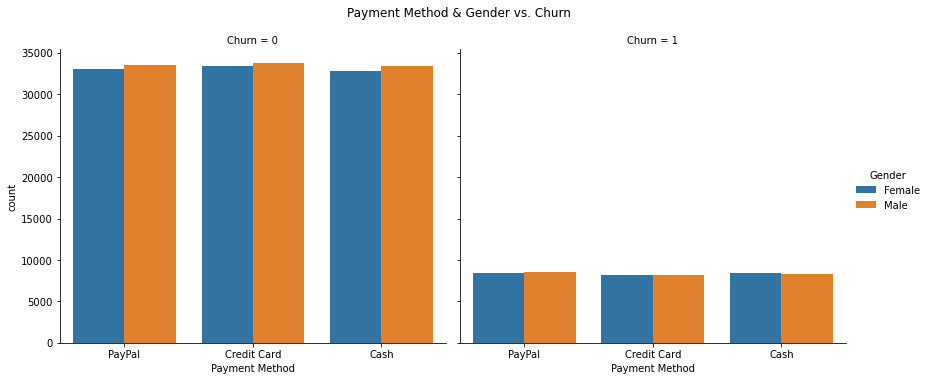

In [25]:
# payment method and gender influence churn
sns.catplot(data=df, x='Payment Method', hue='Gender', col='Churn', kind='count', height=5, aspect=1.2)
plt.suptitle("Payment Method & Gender vs. Churn", y=1.05)
plt.show()


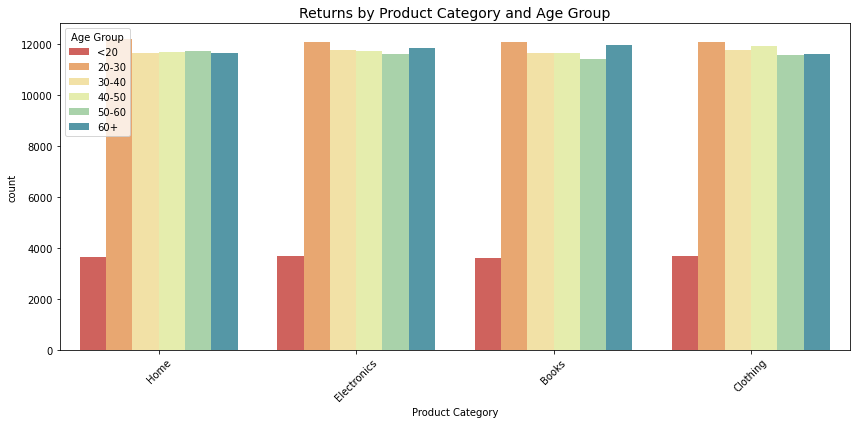

In [26]:
# age group + product category relate to returns
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Purchase Month'] = df['Purchase Date'].dt.month
df['Purchase Weekday'] = df['Purchase Date'].dt.day_name()

df['Age Group'] = pd.cut(df['Customer Age'], bins=[0, 20, 30, 40, 50, 60, 100], 
                         labels=['<20','20-30','30-40','40-50','50-60','60+'])

plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['Returns'].notnull()], 
              x='Product Category', 
              hue='Age Group', 
              palette='Spectral')

plt.title("Returns by Product Category and Age Group", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Feature Engineering

Craft new features that could reveal behavior:

Average Order Value = Total Purchase Amount / Quantity

Return Rate = Returns / Purchases

Is Frequent Buyer = flag customers with > X purchases

Day of Week or Month extracted from Purchase Date


In [27]:
#Average Order Value (AOV)-This helps show customer purchasing power per item:
df['Average Order Value'] = df['Total Purchase Amount'] / df['Quantity']

#Purchase Date Features (Day, Weekday, Month):This helps detect temporal patterns (e.g. more sales on weekends):
# Convert to datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Extract features
df['Purchase Day'] = df['Purchase Date'].dt.day
df['Purchase Month'] = df['Purchase Date'].dt.month
df['Purchase Weekday'] = df['Purchase Date'].dt.day_name()
df['Purchase Hour'] = df['Purchase Date'].dt.hour  

In [28]:
#Return Flag(Yes/No)
df['Has Returned'] = df['Returns'].apply(lambda x: 'Yes' if x == 1 else 'No' if x == 0 else 'Unknown')

In [29]:
# Churn label for cleaner plotting
df['Churn Label'] = df['Churn'].map({0: 'Retained', 1: 'Churned'})

In [30]:
#Customer Type: Frequent vs One-Time
customer_freq = df['Customer ID'].value_counts()
df['Customer Type'] = df['Customer ID'].apply(lambda x: 'Frequent' if customer_freq[x] > 1 else 'One-Time')


In [31]:
# Confirming the new columns have been added
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,...,Churn,Age Group,Purchase Month,Purchase Weekday,Average Order Value,Purchase Day,Purchase Hour,Has Returned,Churn Label,Customer Type
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1,John Rivera,...,0,30-40,5,Wednesday,2427.000000,3,21,Yes,Retained,Frequent
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1,John Rivera,...,0,30-40,5,Sunday,816.000000,16,13,Yes,Retained,Frequent
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1,John Rivera,...,0,30-40,7,Monday,2345.000000,13,6,Yes,Retained,Frequent
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0,John Rivera,...,0,30-40,1,Tuesday,312.333333,17,13,No,Retained,Frequent
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1,John Rivera,...,0,30-40,5,Saturday,649.500000,1,11,Yes,Retained,Frequent


# CUSTOMER SEGMENTATION 🔍
I am segmenting based on:

A. Purchase Behavior; spend, returns

B. Demographics; age group, gender

C. Engagement; churned or retained


In [32]:
#  Define Customer Segments by Behavior
# 1. Total Spend, Orders & Return Rate per Customer
customer_summary = df.groupby('Customer ID').agg({
    'Total Purchase Amount': 'sum',
    'Quantity': 'sum',
    'Returns': lambda x: x.notnull().sum(),
    'Churn': 'max',
    'Customer Age': 'first',
    'Gender': 'first',
}).reset_index()

# Rename for clarity
customer_summary.columns = ['Customer ID', 'Total Spend', 'Total Quantity', 'Total Returns', 'Churn', 'Age', 'Gender']

# Add Spend per Unit
customer_summary['Avg Spend per Item'] = customer_summary['Total Spend'] / customer_summary['Total Quantity']

# Return Rate
customer_summary['Return Rate'] = customer_summary['Total Returns'] / customer_summary['Total Quantity']

In [33]:
# Create Tiered Segments Based on Spend
def spending_tier(spend):
    if spend > 10000:
        return 'High Spender'
    elif spend > 5000:
        return 'Mid Spender'
    else:
        return 'Low Spender'

customer_summary['Spending Segment'] = customer_summary['Total Spend'].apply(spending_tier)

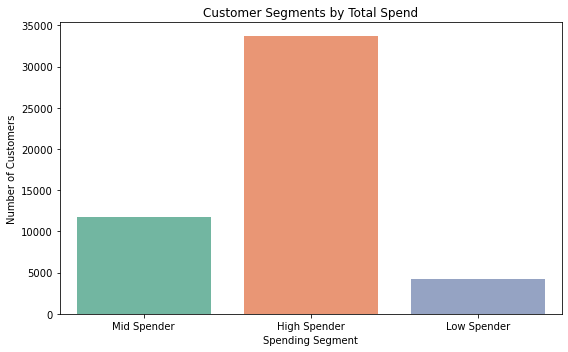

In [34]:
# Visualization of the segment distributions
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=customer_summary, x='Spending Segment', palette='Set2')
plt.title("Customer Segments by Total Spend")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

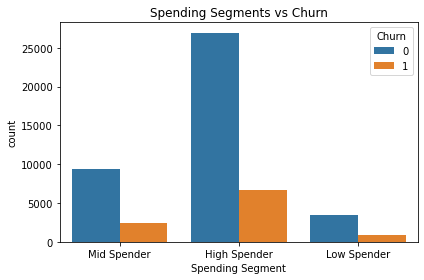

In [35]:
# Cross segments with churn
sns.countplot(data=customer_summary, x='Spending Segment', hue='Churn')
plt.title("Spending Segments vs Churn")
plt.tight_layout()
plt.show()

0    79.948
1    20.052
Name: Churn, dtype: float64


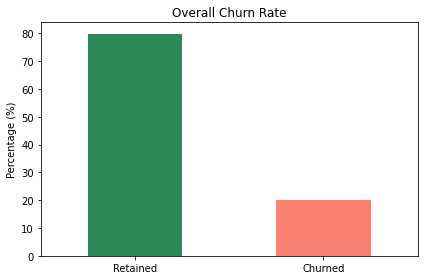

In [36]:
# Overall churn rate
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)

churn_rate.plot(kind='bar', color=['seagreen', 'salmon'])
plt.title("Overall Churn Rate")
plt.xticks([0, 1], ['Retained', 'Churned'], rotation=0)
plt.ylabel("Percentage (%)")
plt.tight_layout()
plt.show()

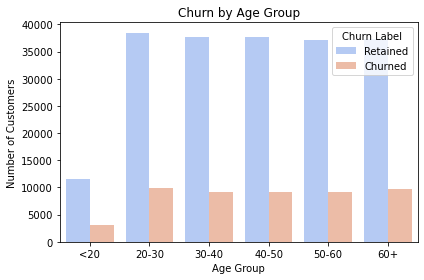

In [37]:
# Churn by age group
sns.countplot(data=df, x='Age Group', hue='Churn Label', palette='coolwarm')
plt.title("Churn by Age Group")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

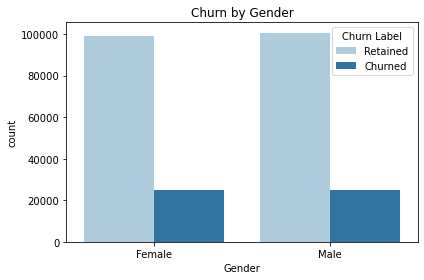

In [38]:
# Churn by gender
sns.countplot(data=df, x='Gender', hue='Churn Label', palette='Paired')
plt.title("Churn by Gender")
plt.tight_layout()
plt.show()

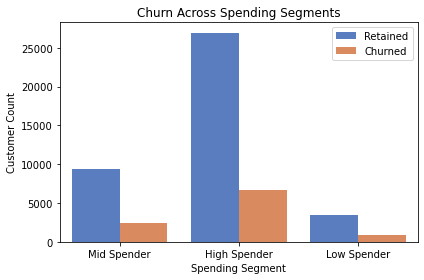

In [39]:
# Churn vs. Spending Segment
sns.countplot(data=customer_summary, x='Spending Segment', hue='Churn', palette='muted')
plt.title("Churn Across Spending Segments")
plt.xlabel("Spending Segment")
plt.ylabel("Customer Count")
plt.xticks(rotation=0)
plt.legend(labels=['Retained', 'Churned'])
plt.tight_layout()
plt.show()

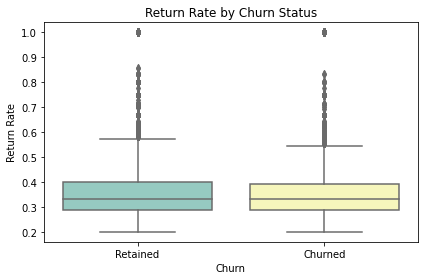

In [40]:
# Return Rate vs Churn (Box Plot)
sns.boxplot(data=customer_summary, x='Churn', y='Return Rate', palette='Set3')
plt.title("Return Rate by Churn Status")
plt.xticks([0, 1], ['Retained', 'Churned'])
plt.tight_layout()
plt.show()

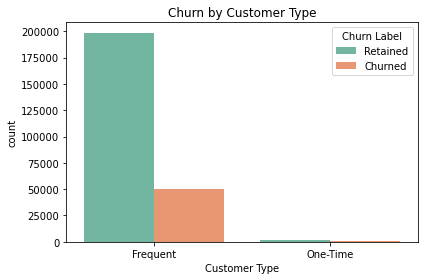

In [41]:
# Average Order Value (AOV) by Churn
sns.countplot(data=df, x='Customer Type', hue='Churn Label', palette='Set2')
plt.title("Churn by Customer Type")
plt.tight_layout()
plt.show()

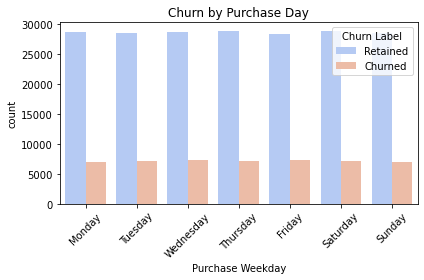

In [42]:
# Churn by Weekday
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.countplot(data=df, x='Purchase Weekday', hue='Churn Label', order=weekday_order, palette='coolwarm')
plt.title("Churn by Purchase Day")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

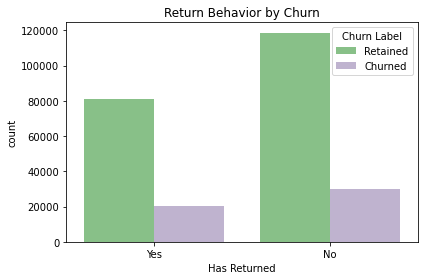

In [43]:
# Return Behavior by ‘Has Returned’ Flag
sns.countplot(data=df[df['Has Returned'] != 'Unknown'], x='Has Returned', hue='Churn Label', palette='Accent')
plt.title("Return Behavior by Churn")
plt.tight_layout()
plt.show()


* This is the version I'm working with*











